In [1]:
# Dependencies
import numpy as np
import pandas as pd
from enum import Enum
import random
import matplotlib.pyplot as plt

In [2]:
# Enums
class Color(Enum):
    BLACK = 0
    RED = 1
    BLUE = 2
    YELLOW = 3
    GREEN = 4

class Label(Enum):
    DANGEROUS = 0
    SAFE = 1

COLOR_TO_RGB = {
    0 : (0, 0, 0),
    1 : (255, 0, 0),
    2 : (0, 0, 255),
    3 : (255, 255, 0),
    4 : (0, 255, 0)
}

In [3]:
# Image Generation
class Image: # USE THIS CLASS TO DISPLAY / CREATE IMAGE
    def __init__(self, data, label, third_wire):
        self.data = data
        self.label = label
        self.third_wire = third_wire

    def display(self):
        n = self.data.shape[0]
        image_data = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                curr_val = self.data[i][j]
                image_data[i][j] = COLOR_TO_RGB[curr_val]

        plt.imshow(image_data)
        plt.axis("off")
        plt.show()

class DataSet:
    def __init__(self):
        self.image_data = []
        self.labels = []
        self.third_wires = []

    def add_image(self, image, label, third_wire):
        """Add an image to the dataset using raw data"""
        self.image_data.append(image)
        self.labels.append(label.value)
        self.third_wires.append(third_wire) 

class ImageGenerator:
    """Generates N (M x M) images and writes to data"""
    def __init__(self, num_images, dimensions = 20, write_path = None, dataset = None, seed = None):
        self.dimensions = dimensions
        self.seed = seed
        random.seed(seed)
        for _ in range(num_images):
            data, label, third_wire = self.generate(write_path is not None)
            if dataset is not None:
                dataset.add_image(data, label, third_wire)

            # TODO: Write to data (may not be necessary, gen is really fast)
            if write_path is not None:
                pass

    def generate(self, write_ = False):
        """Generate a single image and label it appropriately"""
        n = self.dimensions
        image_data = np.full((n, n), Color.BLACK.value)
        colors = [Color.RED, Color.BLUE, Color.YELLOW, Color.GREEN]

        # Keep track of rows/cols that can be used
        valid_rows = list(range(n))
        valid_cols = list(range(n))

        # 1  = Color Row
        # -1 = Color Col
        pointer = random.choice([1, -1])
        label = Label.SAFE
        yellow_placed = False
        third_wire = None

        for i in range(4):
            # Select a unused color
            curr_color = random.choice(colors)
            colors.remove(curr_color)

            # Determine which should be cut (if dangerous)
            if i == 2:
                third_wire = curr_color
            
            # Handle marking an image as DANGEROUS if red is placed before yellow
            yellow_placed = yellow_placed or curr_color == Color.YELLOW
            if curr_color == Color.RED and not yellow_placed:
                label = Label.DANGEROUS

            if pointer == 1:
                rand_idx = random.choice(valid_rows)
                valid_rows.remove(rand_idx)
                self.color_row(rand_idx, curr_color, image_data)
            else:
                rand_idx = random.choice(valid_cols)
                valid_cols.remove(rand_idx)
                self.color_column(rand_idx, curr_color, image_data)
                
            pointer *= -1
        
        return image_data, label, third_wire
            

    def color_column(self, col, color, arr):
        """Color the given column of the image with the provided color"""
        n = self.dimensions
        for i in range(n):
            arr[i][col] = color.value

    def color_row(self, row, color, arr):
        """Color the given row of the image with the provided color"""
        n = self.dimensions
        for i in range(n):
            arr[row][i] = color.value

In [4]:
data = DataSet()
img_gen = ImageGenerator(50, dataset = data, seed = 718067190)

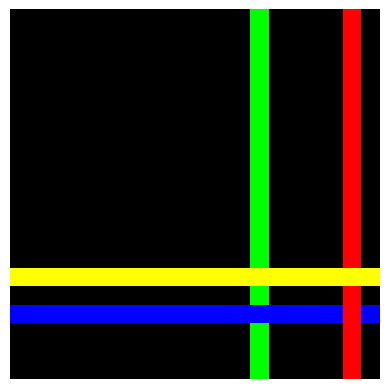

In [5]:
def load_image(dataset_obj, index):
    """Load a specific index of the dataset"""
    image_data = dataset_obj.image_data[index]
    label = dataset_obj.labels[index]
    third_wire = dataset_obj.third_wires[index]
    img = Image(image_data, label, third_wire)
    return img

load_image(data, 20).display()

In [6]:
# Math Stuff
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# Logistic Regression - Task 1
class LogisticRegression:
    def __init__(self, examples, labels, alpha):
        self.m = len(examples)                                # of training examples
        self.n = len(examples[0])                             # of features
        self.examples = np.c_[np.ones(self.m), examples]      # Add column of 1s for W_0
        self.labels = labels                                  # Classification Labels
        self.parameters = np.zeros(self.n + 1)                # Current parameters / weights
        self.alpha = alpha                                    # Learning rate   

    def predict(self):
        """Compute h_w(x_i) for the provided weight values"""
        dot_product = np.dot(self.examples, self.parameters)
        return sigmoid(dot_product)

    def loss(self, predictions):
        """Compute the current value of average loss based on predictions"""
        y = self.labels
        return np.sum((-y * np.log(predictions) - ((1 - y) * np.log(1 - predictions))))

    def sgd(self):
        """Run Stochastic Gradient Descent to find `parameters` to minimize loss"""
        pass

In [8]:
# Preprocess data (this should be done somewhere else, but here for now)
image_data = np.array(data.image_data)
label_data = np.array(data.labels)
flattened_data = image_data.reshape(image_data.shape[0], -1)


(50, 400)

In [10]:
# 
lr = LogisticRegression(flattened_data, label_data, .0001)
predictions = lr.predict()
loss = lr.loss(predictions)
predictions

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])